<a href="https://colab.research.google.com/github/ClaytonLucas/reconhecimento-facial-FaceNet/blob/master/reconhecimento_facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install keras-facenet mtcnn opencv-python numpy tensorflow scipy


In [14]:
import cv2
import numpy as np
import tensorflow as tf
from mtcnn import MTCNN
from keras_facenet import FaceNet
from scipy.spatial.distance import cosine


detector = MTCNN()
embedder = FaceNet()

print("MTCNN e FaceNet carregados com sucesso!")


MTCNN e FaceNet carregados com sucesso!


In [15]:
# Banco de dados com embeddings de pessoas conhecidas
def extrair_embedding(imagem_path):
    imagem = cv2.imread(imagem_path)
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

    # Detecta rostos
    detecoes = detector.detect_faces(imagem_rgb)
    if not detecoes:
        return None  # Nenhum rosto encontrado

    # Obtém a bounding box do primeiro rosto detectado
    x, y, largura, altura = detecoes[0]["box"]
    rosto = imagem_rgb[y:y+altura, x:x+largura]

    # Gera a embedding
    embedding = embedder.embeddings([rosto])[0]
    return embedding

# Criando o banco de dados com embeddings das pessoas
face_database = {
    "Leonard": extrair_embedding("Leonard-Big-Bang-Theory.jpg"),
    "Penny": extrair_embedding("penny-the-big-bang-theory-720x720.jpg"),
    "Raj": extrair_embedding("Raj-The-Big-Bang-Theory.jpg"),
    "Sheldon": extrair_embedding("sheldon.jpg"),
    "Howard": extrair_embedding("howard.jpg"),
}


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [17]:
import matplotlib.pyplot as plt
import cv2

def exibir_imagem(imagem):
    # Converter para RGB (o OpenCV usa BGR)
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

    # Exibir a imagem
    plt.figure(figsize=(8, 6))
    plt.imshow(imagem_rgb)
    plt.axis("off")  # Remove os eixos
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


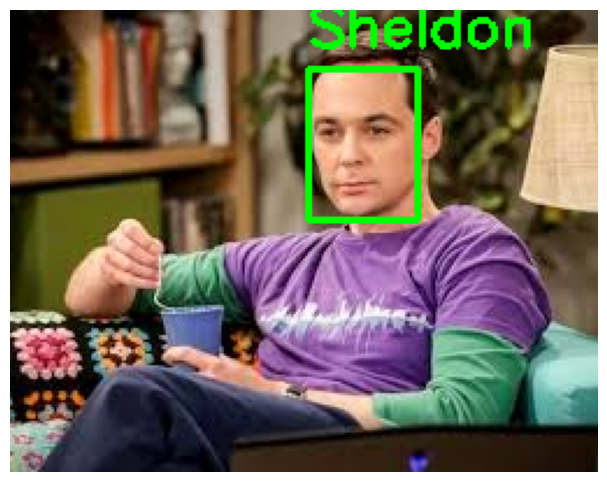

In [20]:

def reconhecer_e_exibir(imagem_path, database, threshold=0.5):
    # Carrega a imagem
    imagem = cv2.imread(imagem_path)
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

    # Detecta rostos
    detecoes = detector.detect_faces(imagem_rgb)

    if detecoes:
        for det in detecoes:
            # Obtém as coordenadas do rosto
            x, y, largura, altura = det["box"]
            rosto = imagem_rgb[y:y+altura, x:x+largura]

            # Verifica se o recorte do rosto não está vazio
            if rosto.size == 0:
                continue

            # Obtém a embedding do rosto detectado
            embedding = embedder.embeddings([rosto])[0]

            # Compara com cada pessoa no banco de dados
            melhor_match = "Desconhecido"
            menor_distancia = threshold

            for nome, emb in database.items():
                if emb is None:
                    continue  # Ignora rostos não processados

                dist = cosine(embedding, emb)
                if dist < menor_distancia:
                    menor_distancia = dist
                    melhor_match = nome

            # Desenha um retângulo ao redor do rosto
            cv2.rectangle(imagem, (x, y), (x + largura, y + altura), (0, 255, 0), 2)

            # Exibe o nome da pessoa reconhecida
            cv2.putText(imagem, melhor_match, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # Mostra a imagem com os rostos detectados e identificados
    exibir_imagem(imagem)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Teste com uma nova imagem
reconhecer_e_exibir("sheldon-test.jpg", face_database)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


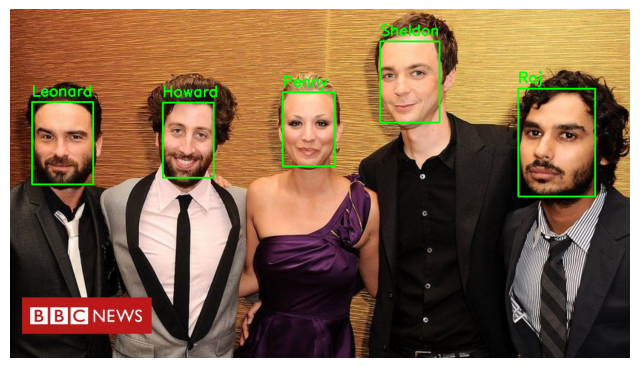

In [19]:

def reconhecer_e_exibir(imagem_path, database, threshold=0.5):
    # Carrega a imagem
    imagem = cv2.imread(imagem_path)
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

    # Detecta rostos
    detecoes = detector.detect_faces(imagem_rgb)

    if detecoes:
        for det in detecoes:
            # Obtém as coordenadas do rosto
            x, y, largura, altura = det["box"]
            rosto = imagem_rgb[y:y+altura, x:x+largura]

            # Verifica se o recorte do rosto não está vazio
            if rosto.size == 0:
                continue

            # Obtém a embedding do rosto detectado
            embedding = embedder.embeddings([rosto])[0]

            # Compara com cada pessoa no banco de dados
            melhor_match = "Desconhecido"
            menor_distancia = threshold

            for nome, emb in database.items():
                if emb is None:
                    continue  # Ignora rostos não processados

                dist = cosine(embedding, emb)
                if dist < menor_distancia:
                    menor_distancia = dist
                    melhor_match = nome

            # Desenha um retângulo ao redor do rosto
            cv2.rectangle(imagem, (x, y), (x + largura, y + altura), (0, 255, 0), 2)

            # Exibe o nome da pessoa reconhecida
            cv2.putText(imagem, melhor_match, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # Mostra a imagem com os rostos detectados e identificados
    exibir_imagem(imagem)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Teste com uma nova imagem
reconhecer_e_exibir("elenco.jpg", face_database)
